# SAB prediction

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
output_folder = './validation_report/SAB'
today = pd.Timestamp.today().strftime('%Y-%m-%d')

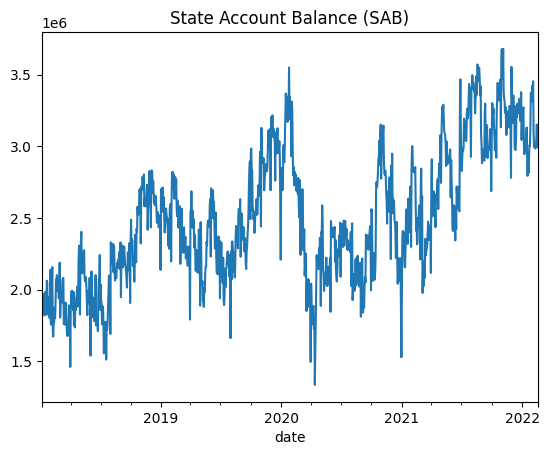

In [3]:
data = pd.read_excel('../data/SAB.xlsx', parse_dates=['date'], index_col='date')
data['SAB'].plot(title = 'State Account Balance (SAB)'); plt.show()

## Section 2: Model Definition

In [4]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.statsforecast import (
    StatsForecastAutoARIMA,
    StatsForecastAutoETS,
    StatsForecastAutoCES, 
    StatsForecastAutoTheta,
    StatsForecastMSTL,
    StatsForecastAutoTBATS,
)
from sktime.forecasting.fbprophet import Prophet

In [5]:
ForecastingModels = {
    "Naive": NaiveForecaster(),
    "Seasonal_Naive": NaiveForecaster(sp = 20),
    "AutoARIMA": StatsForecastAutoARIMA(
                    trend=True, seasonal=True,
                    max_D = 20, max_p= 10, max_q=10),
    "AutoETS": StatsForecastAutoETS(season_length=20),
    "AutoCES": StatsForecastAutoCES(season_length=20),
    "AutoTheta": StatsForecastAutoTheta(season_length=20),
    "AutoTBATS": StatsForecastAutoTBATS(seasonal_periods=20, 
                                        use_trend =True, use_boxcox=True),
    "LOESS": StatsForecastMSTL(season_length=20),
    "Prophet": Prophet(yearly_seasonality=True, weekly_seasonality=True),
}
from forecast_combine import model_select as f
model = f.ForecastModelSelect(
            data= data,
            depvar_str = 'SAB',                 
            exog_l=None,
            fh = 10,
            pct_initial_window=0.75,
            step_length = 5,
            forecasters_d= ForecastingModels,
            freq = 'B',
            mode = 'best_horizon',
            score = 'RMSE', 
            nbest = 2)

/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
Importing plotly failed. Interactive plots will not work.


### Cross validation Procedure

Number of Folds      : 53
Initial Window Size  : 808
Step Length          : 5
Forecast Horizon     : 10
First Cutoff         : 2021-02-05 00:00:00
Last Curoff          : 2022-02-04 00:00:00


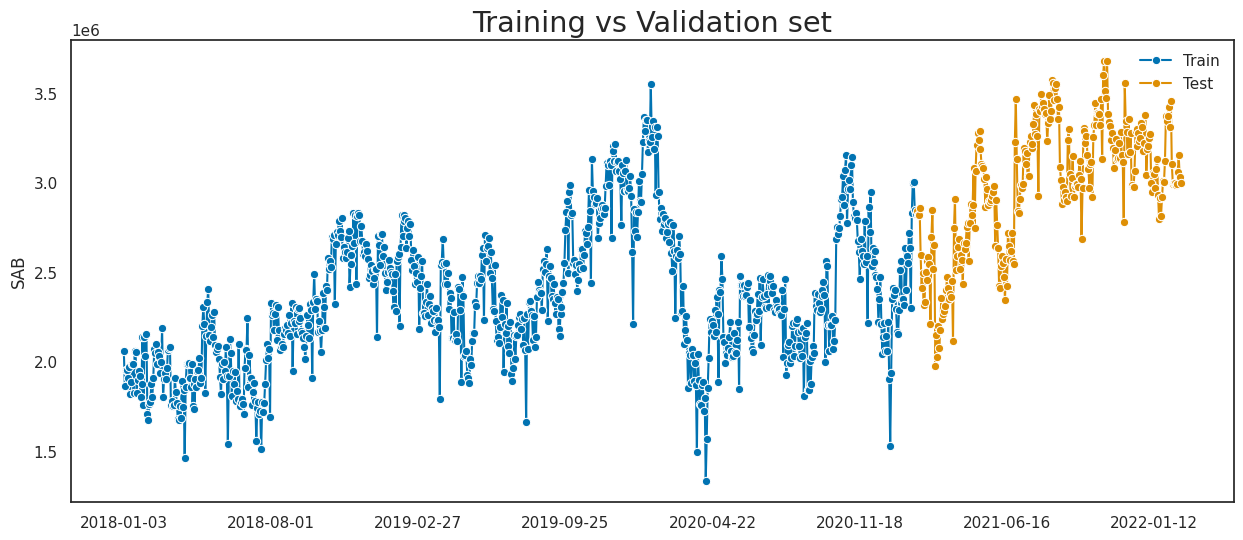

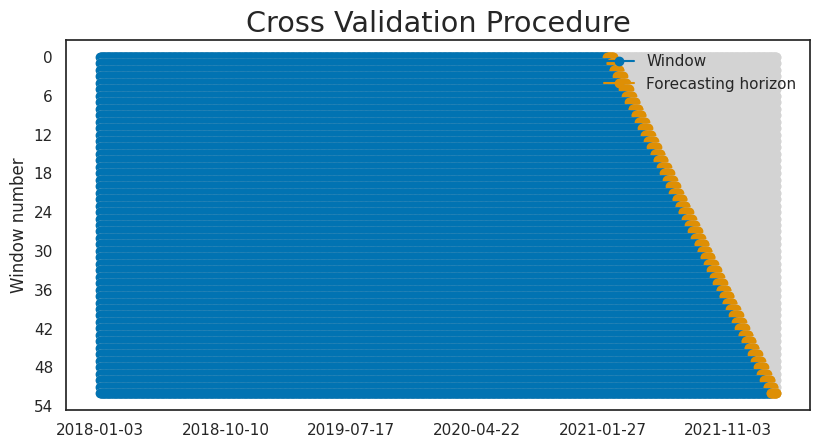

In [6]:
_ = model.split_procedure_summary()

model.plot_train_test(
    labels = ['Train', 'Test'],
    title='Training vs Validation set')
plt.savefig(os.path.join(output_folder, f'train_test_{today}.png'), dpi=300)
model.plot_cv_procedure(xlabel='')
plt.savefig(os.path.join(output_folder, f'cross_validation_{today}.png'), dpi=300)

### Out-Of-sample Evaluation

In [7]:
summary_horizon, summary_results = model.evaluate()


Start Naive forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.037 minutes

Start Seasonal_Naive forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a Dat

Evaluation completed in: 0.021 minutes

Start AutoARIMA forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/

Evaluation completed in: 0.216 minutes

Start AutoETS forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.333 minutes

Start AutoCES forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.364 minutes

Start AutoTheta forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.35 minutes

Start AutoTBATS forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated

Evaluation completed in: 0.254 minutes

Start LOESS forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a Dat

Evaluation completed in: 0.156 minutes

Start Prophet forecaster evalution....


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plot

Evaluation completed in: 0.016 minutes


In [8]:
display(summary_results.T.sort_values('Avg MAPE'))
display(summary_horizon.T)

,Number of Folds,Avg Fit time (s),Avg_pred_time (s),Smallest training window,Largest training window,First cutoff,Last cutoff,Avg RMSE,Avg MAE,Avg MAPE,Avg R2,Avg MedianAE
AutoTBATS,53,9.146943,0.005183,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,223782.387496,194173.786408,0.065489,-3.400342,184150.868631
AutoARIMA,53,11.16036,1.077825,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,229203.76918,198740.437975,0.067649,-3.582866,186965.619594
AutoETS,53,19.288045,0.385341,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,230112.717021,199578.876803,0.067844,-3.596628,188468.265861
AutoCES,53,20.751105,0.25325,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,233195.220035,202304.254763,0.068758,-3.888876,192397.949788
AutoTheta,53,14.539686,0.209373,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,234145.079103,202972.741876,0.068977,-3.970418,192549.547254
LOESS,53,3.714552,0.161934,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,237824.601554,206476.553809,0.070409,-4.422163,193929.778876
Naive,53,0.003193,0.046704,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,251095.772231,218947.666038,0.073843,-5.439758,207112.160377
Seasonal_Naive,53,0.002408,0.037719,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,349717.748082,310801.456604,0.106995,-9.07095,299919.924528
Prophet,53,0.198932,0.03712,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,406353.952013,378574.679627,0.127127,-14.755643,371172.956824


horizon                             1              2              3   \
Naive          RMSE      211856.313601  253607.162089  237623.073328   
               MAE       149182.018868  175527.415094  179908.962264   
               MAPE           0.050071       0.057215       0.060512   
               R2             0.661804       0.452235       0.574895   
               MedianAE   93095.000000  110562.000000  112338.000000   
Seasonal_Naive RMSE      380044.683758  378139.782789  372409.819890   
               MAE       316415.679245  318598.018868  313840.905660   
               MAPE           0.108689       0.109573       0.107678   
               R2            -0.088315      -0.217799      -0.044146   
               MedianAE  262657.000000  305773.000000  287989.000000   
AutoARIMA      RMSE      187471.946959  224239.092341  206214.618537   
               MAE       143712.561059  158230.400818  160482.798519   
               MAPE           0.048625       0.052631       0.054213   
               R2             0.735176       0.571754       0.679847   
               MedianAE  122916.667775  108415.608469  119598.067662   
AutoETS        RMSE      187671.681503  224888.727987  206668.983338   
               MAE       143884.734899  157990.285971  160609.950098   
               MAPE           0.048657       0.052556       0.054228   
               R2             0.734611       0.569269       0.678435   
               MedianAE  128082.670289  110875.417522  119783.670289   
AutoCES        RMSE      190513.524651  226291.825428  210543.231136   
               MAE       148794.037653  159070.158402  163048.146816   
               MAPE           0.050468       0.052842       0.055204   
               R2             0.726513       0.563877       0.666265   
               MedianAE  127709.683594  110980.623535  114888.691406   
AutoTheta      RMSE      193057.607033  226838.416452  213426.341344   
               MAE       153721.583642  159078.376484  164650.683082   
               MAPE           0.052068       0.052798       0.055692   
               R2             0.719160       0.561768       0.657063   
               MedianAE  129755.327568  106821.736674  114712.057196   
AutoTBATS      RMSE      186274.235571  224010.056631  204598.462088   
               MAE       142090.456464  156381.392250  159287.692051   
               MAPE           0.048007       0.051886       0.053582   
               R2             0.738549       0.572628       0.684845   
               MedianAE  122168.480478  104621.004962  119860.625508   
LOESS          RMSE      202625.229806  245268.064041  221303.580791   
               MAE       157354.115888  185788.972259  170480.611045   
               MAPE           0.053447       0.061406       0.057775   
               R2             0.690634       0.487666       0.631281   
               MedianAE  137406.500557  143799.627675  146974.877781   
Prophet        RMSE      380453.407522  412913.109236  393223.339874   
               MAE       336138.380768  361668.014547  348579.069972   
               MAPE           0.113370       0.121544       0.116887   
               R2            -0.090657      -0.452072      -0.164119   
               MedianAE  374224.306030  371582.083092  366030.072047   

horizon                             4              5              6   \
Naive          RMSE      243117.264690  285055.946401  291537.220597   
               MAE       199137.792453  238393.188679  245589.811321   
               MAPE           0.066763       0.080647       0.082762   
               R2             0.499913       0.422464       0.357564   
               MedianAE  161985.000000  217860.000000  228049.000000   
Seasonal_Naive RMSE      351426.378342  398782.576017  368960.816956   
               MAE       290577.188679  327103.490566  306233.886792   
               MAPE           0.100069       0.113640       0.105062   
               R2            -0.044920 

In [9]:
rank, score = model.select_best(score = 'MAPE')
display(rank)
display(score)

horizon,1,2,3,4,5,6,7,8,9,10
Best_1,AutoTBATS,AutoTBATS,AutoTBATS,AutoTBATS,AutoTBATS,AutoTBATS,AutoTBATS,AutoTBATS,AutoTBATS,AutoTBATS
Best_2,AutoARIMA,AutoETS,AutoARIMA,AutoARIMA,AutoARIMA,AutoARIMA,LOESS,AutoARIMA,AutoARIMA,AutoARIMA
Best_3,AutoETS,AutoARIMA,AutoETS,AutoETS,AutoETS,AutoETS,AutoARIMA,AutoETS,LOESS,AutoETS
Best_4,Naive,AutoTheta,AutoCES,AutoCES,AutoTheta,AutoTheta,AutoTheta,AutoCES,AutoETS,AutoCES
Best_5,AutoCES,AutoCES,AutoTheta,AutoTheta,AutoCES,AutoCES,AutoETS,AutoTheta,AutoCES,AutoTheta
Best_6,AutoTheta,Naive,LOESS,LOESS,LOESS,LOESS,AutoCES,LOESS,AutoTheta,LOESS
Best_7,LOESS,LOESS,Naive,Naive,Naive,Naive,Naive,Naive,Naive,Naive
Best_8,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive
Best_9,Prophet,Prophet,Prophet,Prophet,Prophet,Prophet,Prophet,Prophet,Prophet,Prophet


,Naive,Seasonal_Naive,AutoARIMA,AutoETS,AutoCES,AutoTheta,AutoTBATS,LOESS,Prophet,Best Model (over all),Best Model (per horizon),Best 2 Models (over all),Best 2 Models (per horizon),Model Avg (all models)
horizon,,,,,,,,,,,,,,
1,0.050071,0.108689,0.048625,0.048657,0.050468,0.052068,0.048007,0.053447,0.113370,0.048007,0.048007,0.048316,0.048316,0.063711
2,0.057215,0.109573,0.052631,0.052556,0.052842,0.052798,0.051886,0.061406,0.121544,0.051886,0.051886,0.052259,0.052221,0.068050
3,0.060512,0.107678,0.054213,0.054228,0.055204,0.055692,0.053582,0.057775,0.116887,0.053582,0.053582,0.053897,0.053897,0.068419
4,0.066763,0.100069,0.057900,0.058001,0.058806,0.059664,0.056555,0.061040,0.118911,0.056555,0.056555,0.057227,0.057227,0.070856
5,0.080647,0.113640,0.074671,0.074924,0.075350,0.075106,0.072234,0.076013,0.119747,0.072234,0.072234,0.073453,0.073453,0.084704
6,0.082762,0.105062,0.076020,0.076472,0.077461,0.077066,0.074614,0.078060,0.133501,0.074614,0.074614,0.075317,0.075317,0.086780
7,0.083610,0.105934,0.076632,0.077201,0.077573,0.076814,0.075139,0.075569,0.140363,0.075139,0.075139,0.075886,0.075354,0.087648
8,0.082396,0.106256,0.077369,0.077370,0.078075,0.078163,0.073260,0.078569,0.134539,0.073260,0.073260,0.075314,0.075314,0.087333
9,0.083063,0.098535,0.076107,0.076653,0.076892,0.077202,0.072969,0.076299,0.134750,0.072969,0.072969,0.074538,0.074538,0.085830


In [10]:
# export all the result in excel 
with pd.ExcelWriter(os.path.join(output_folder, f'Cross_validation_result_{today}.xlsx')) as writer:
    summary_results.to_excel(writer, sheet_name='summary_results', index=True)
    summary_horizon.to_excel(writer, sheet_name='summary_horizon', index=True)
    rank.to_excel(writer, sheet_name='rank', index=True)
    score.to_excel(writer, sheet_name='score', index=True)

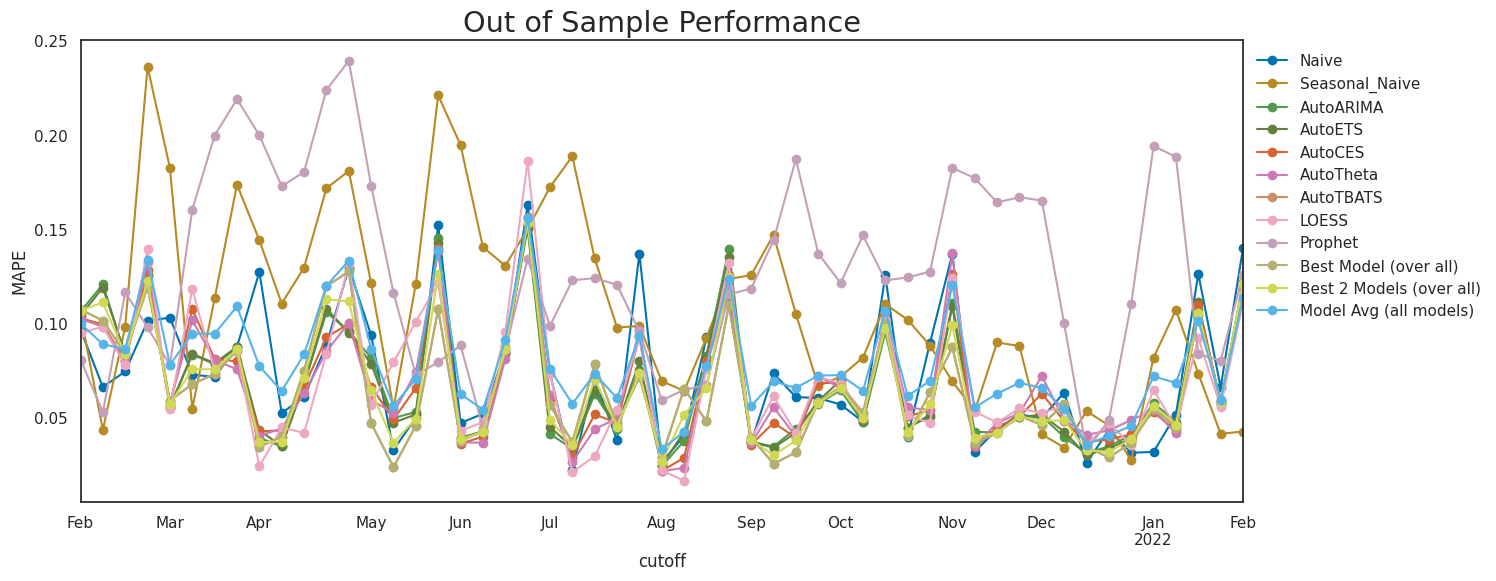

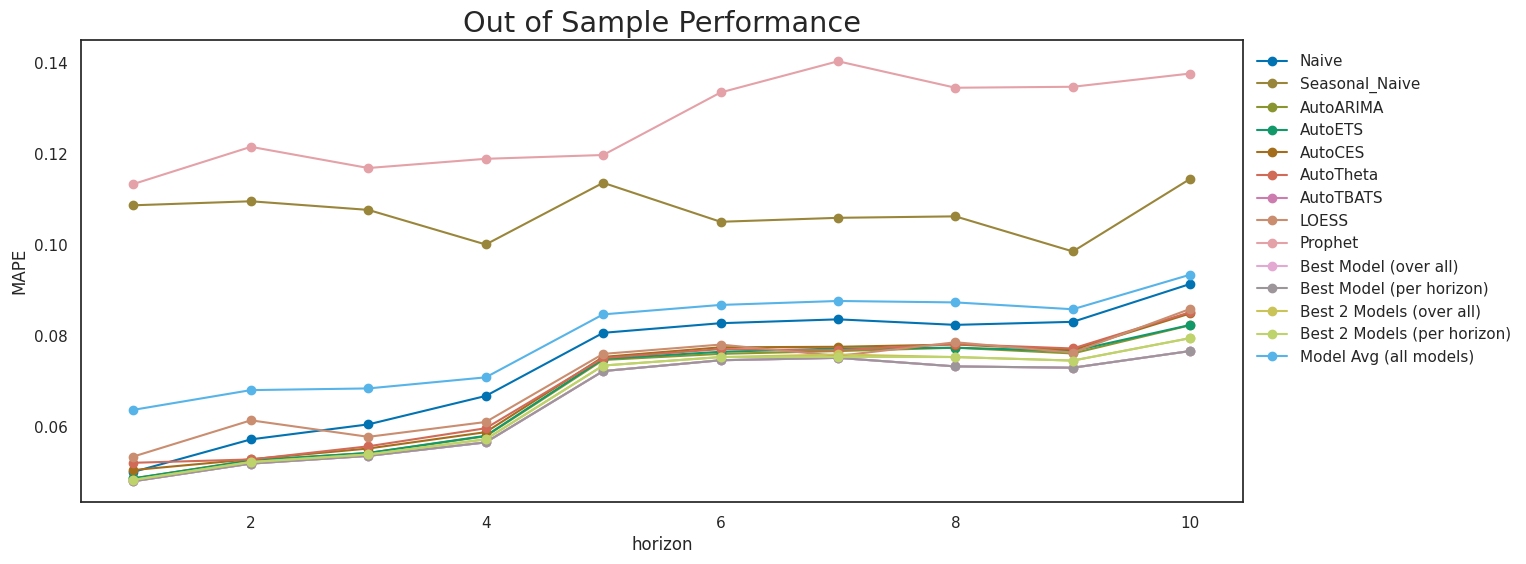

In [11]:
subset = ['AutoETS', 'AutoCES', 'AutoTBATS', 'Prophet','Model Avg (all models)']
model.plot_model_compare(score ='MAPE', view = 'cutoff')#, model_subset=subset)
plt.savefig(os.path.join(output_folder, f'model_compare_per_cutoff_{today}.png'), dpi=300, bbox_inches='tight')
model.plot_model_compare(score ='MAPE', view = 'horizon')#, model_subset=subset + ['Best Model (per horizon)'])
plt.savefig(os.path.join(output_folder, f'model_compare_per_horizon_{today}.png'), dpi=300, bbox_inches='tight')

Fitting Naive ...
Fitting Seasonal_Naive ...
Fitting AutoARIMA ...


Fitting AutoETS ...
Fitting AutoCES ...
Fitting AutoTheta ...
Fitting AutoTBATS ...


19:33:08 - cmdstanpy - INFO - Chain [1] start processing


Fitting LOESS ...
Fitting Prophet ...


19:33:08 - cmdstanpy - INFO - Chain [1] done processing


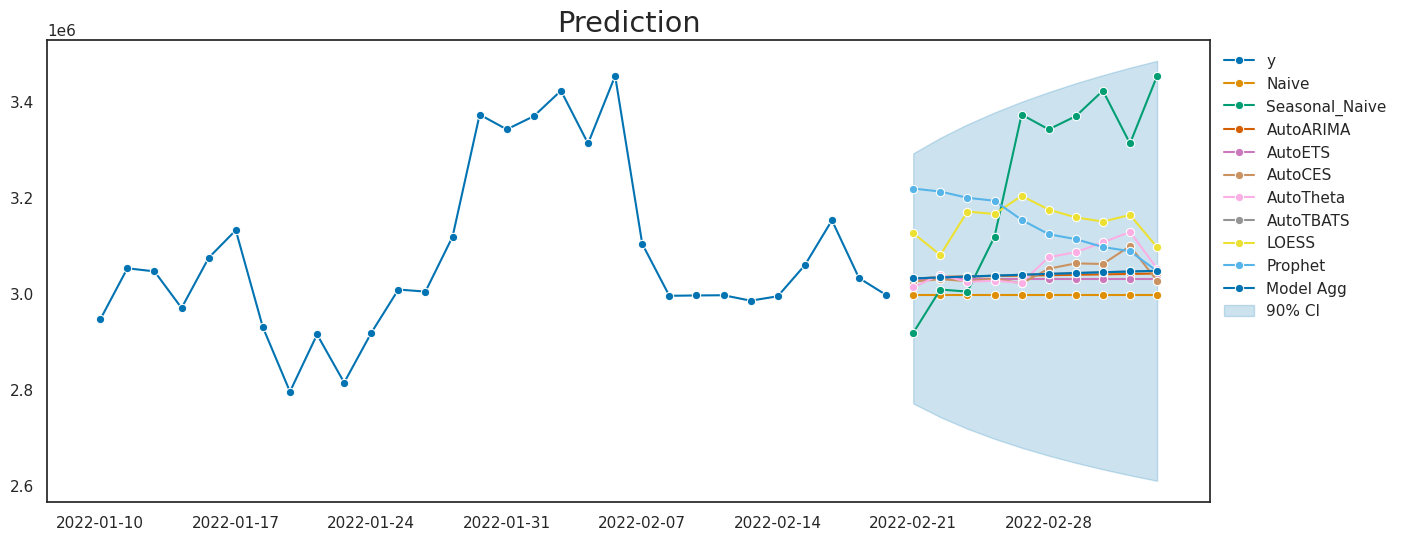

In [12]:
model.fit(verbose = True)
y_pred, y_pred_ints, preds, pred_ints = model.predict(mode='best_horizon', ret_underlying=True)
f, ax =model.plot_prediction(y_pred = y_pred,
                     models_preds = preds,
                     y_pred_interval = y_pred_ints)  

In [13]:
path = '../model_output/SAB_forecast.pkl'
model.save(path)